In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


# 파일가져오기

PLU 코드란 가격 확인 코드로 보통 네 자리 또는 다섯 자리의 숫자로 구성되어 있고 보통은 스티커로 과일이나 채소류의 표면에 부착하여 눈으로 확인할 수 있게 되어 있습니다. PLU 코드는 소비자들을 위한 코드가 아니라 슈퍼마켓 직원들의 편의를 돕기 위해서 개발된 코드입니다. 바코드와 비슷합니다. 

In [3]:
avocado_data = pd.read_csv('../input/avocado-prices/avocado.csv')
avocado_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
avocado_data.info()
avocado_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# 년도별 총판매량 변화

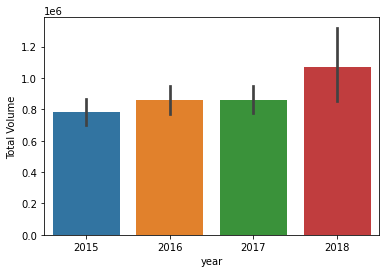

In [5]:
pd.Series.unique(avocado_data['year'])

sns.barplot(data = avocado_data, x = 'year', y = 'Total Volume')

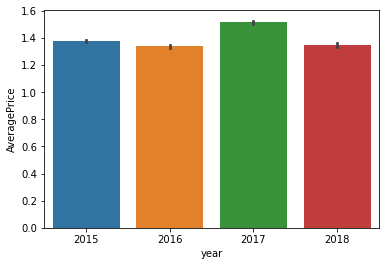

In [6]:
sns.barplot(data = avocado_data, x = 'year', y = 'AveragePrice')

# 지역별 아보카도

[Text(0, 0, 'Albany'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'BaltimoreWashington'),
 Text(0, 0, 'Boise'),
 Text(0, 0, 'Boston'),
 Text(0, 0, 'BuffaloRochester'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Charlotte'),
 Text(0, 0, 'Chicago'),
 Text(0, 0, 'CincinnatiDayton'),
 Text(0, 0, 'Columbus'),
 Text(0, 0, 'DallasFtWorth'),
 Text(0, 0, 'Denver'),
 Text(0, 0, 'Detroit'),
 Text(0, 0, 'GrandRapids'),
 Text(0, 0, 'GreatLakes'),
 Text(0, 0, 'HarrisburgScranton'),
 Text(0, 0, 'HartfordSpringfield'),
 Text(0, 0, 'Houston'),
 Text(0, 0, 'Indianapolis'),
 Text(0, 0, 'Jacksonville'),
 Text(0, 0, 'LasVegas'),
 Text(0, 0, 'LosAngeles'),
 Text(0, 0, 'Louisville'),
 Text(0, 0, 'MiamiFtLauderdale'),
 Text(0, 0, 'Midsouth'),
 Text(0, 0, 'Nashville'),
 Text(0, 0, 'NewOrleansMobile'),
 Text(0, 0, 'NewYork'),
 Text(0, 0, 'Northeast'),
 Text(0, 0, 'NorthernNewEngland'),
 Text(0, 0, 'Orlando'),
 Text(0, 0, 'Philadelphia'),
 Text(0, 0, 'PhoenixTucson'),
 Text(0, 0, 'Pittsburgh'),
 Text(0, 0, 'Plains'),
 Tex

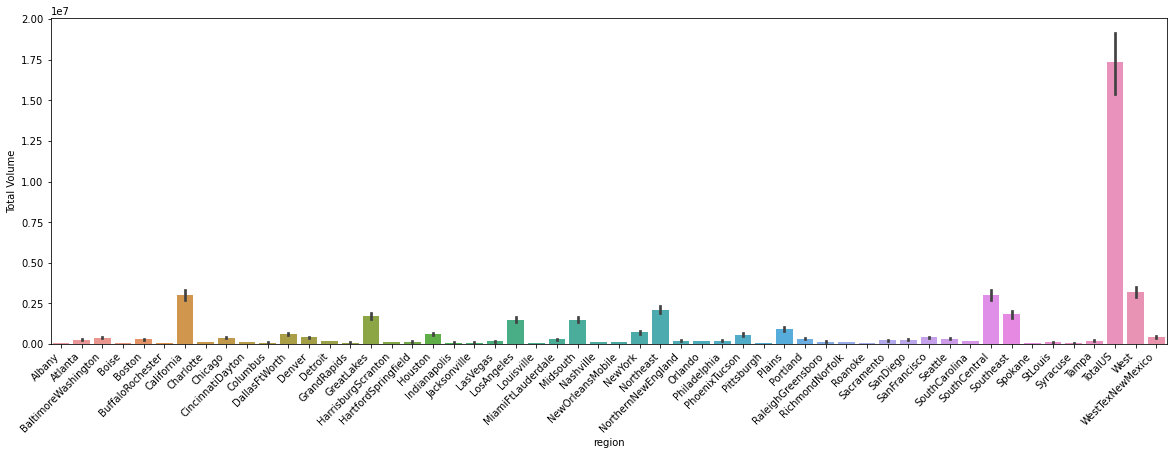

In [7]:
plt.figure(figsize = (20,6))
chart = sns.barplot(data = avocado_data, x = 'region', y = 'Total Volume')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, 'Albany'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'BaltimoreWashington'),
 Text(0, 0, 'Boise'),
 Text(0, 0, 'Boston'),
 Text(0, 0, 'BuffaloRochester'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Charlotte'),
 Text(0, 0, 'Chicago'),
 Text(0, 0, 'CincinnatiDayton'),
 Text(0, 0, 'Columbus'),
 Text(0, 0, 'DallasFtWorth'),
 Text(0, 0, 'Denver'),
 Text(0, 0, 'Detroit'),
 Text(0, 0, 'GrandRapids'),
 Text(0, 0, 'GreatLakes'),
 Text(0, 0, 'HarrisburgScranton'),
 Text(0, 0, 'HartfordSpringfield'),
 Text(0, 0, 'Houston'),
 Text(0, 0, 'Indianapolis'),
 Text(0, 0, 'Jacksonville'),
 Text(0, 0, 'LasVegas'),
 Text(0, 0, 'LosAngeles'),
 Text(0, 0, 'Louisville'),
 Text(0, 0, 'MiamiFtLauderdale'),
 Text(0, 0, 'Midsouth'),
 Text(0, 0, 'Nashville'),
 Text(0, 0, 'NewOrleansMobile'),
 Text(0, 0, 'NewYork'),
 Text(0, 0, 'Northeast'),
 Text(0, 0, 'NorthernNewEngland'),
 Text(0, 0, 'Orlando'),
 Text(0, 0, 'Philadelphia'),
 Text(0, 0, 'PhoenixTucson'),
 Text(0, 0, 'Pittsburgh'),
 Text(0, 0, 'Plains'),
 Tex

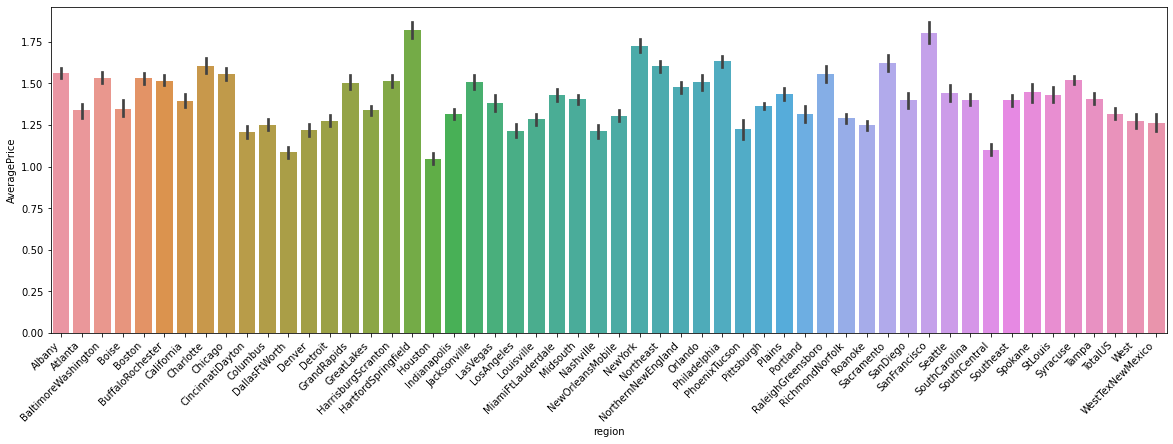

In [8]:
plt.figure(figsize = (20,6))
chart = sns.barplot(data = avocado_data, x = 'region', y = 'AveragePrice')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

<Figure size 720x720 with 0 Axes>

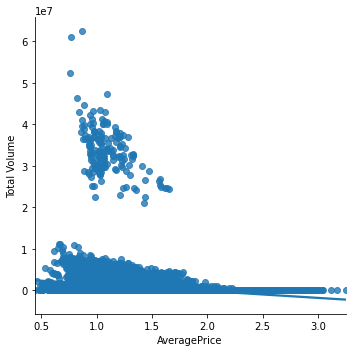

In [9]:
plt.figure(figsize = (10,10))
sns.lmplot(data = avocado_data , x = 'AveragePrice', y = 'Total Volume')

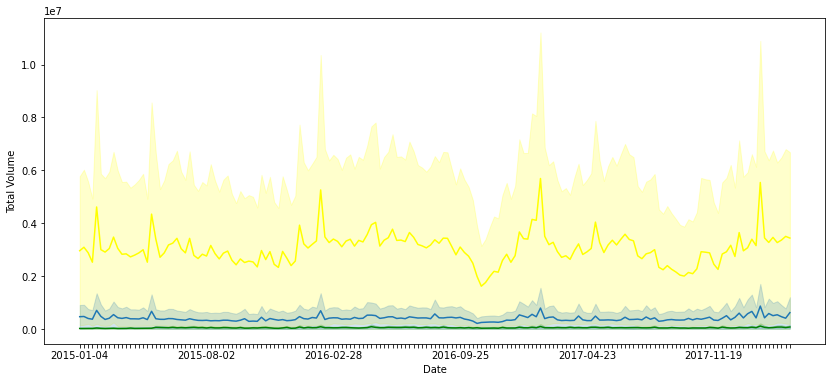

In [17]:
#pd.Series.unique(avocado_data['region'])
albany = avocado_data.loc[avocado_data.region == 'Albany']
california = avocado_data.loc[avocado_data.region == 'California']
sanfrancisco = avocado_data.loc[avocado_data.region == 'SanFrancisco']

plt.figure(figsize = (14,6))
chart = sns.lineplot(data = albany, x = 'Date', y = 'Total Volume', color = 'green')
sns.lineplot(data = california, x = 'Date', y = 'Total Volume', color = 'yellow')###
sns.lineplot(data = sanfrancisco, x = 'Date', y = 'Total Volume')

for ind, label in enumerate(chart.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


#avocado_data.groupby('region').


# 아보카도 타입별

[Text(0, 0, 'conventional'), Text(0, 0, 'organic')]

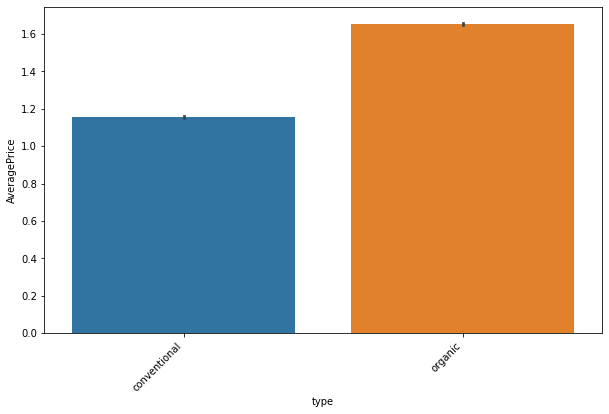

In [11]:
plt.figure(figsize = (10,6))
chart = sns.barplot(data = avocado_data, x = 'type', y = 'AveragePrice')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

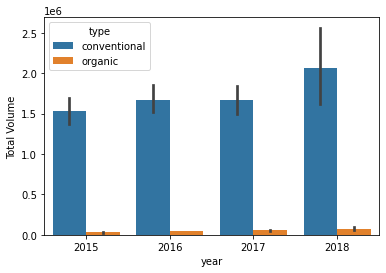

In [12]:
sns.barplot(data = avocado_data, x = 'year', y = 'Total Volume', hue = 'type')

# PLU

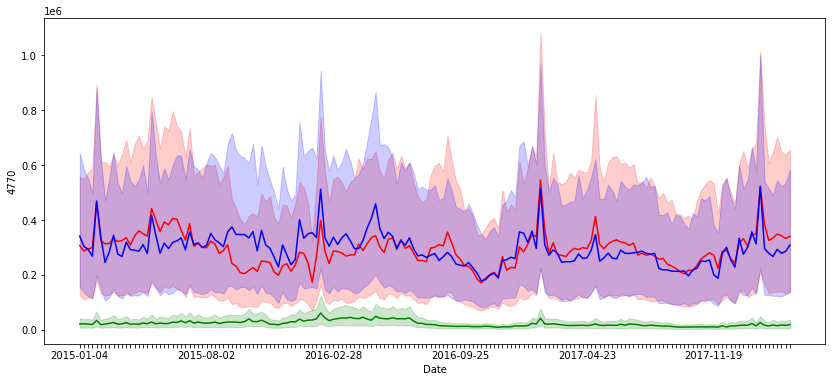

In [19]:
plt.figure(figsize = (14,6))
chart = sns.lineplot(data = avocado_data, x = 'Date', y = '4046', color = 'red')
sns.lineplot(data = avocado_data, x = 'Date', y = '4225', color = 'blue')
sns.lineplot(data = avocado_data, x = 'Date', y = '4770', color = 'green')##가장 작음

for ind, label in enumerate(chart.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# Bags

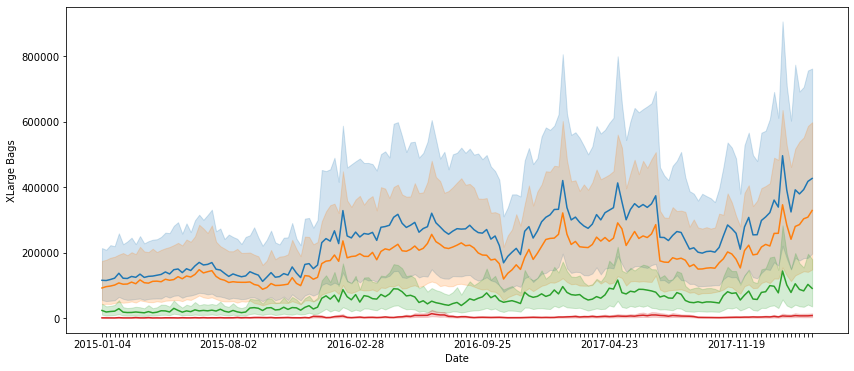

In [14]:
plt.figure(figsize = (14,6))
chart = sns.lineplot(data = avocado_data, x = 'Date', y = 'Total Bags')
sns.lineplot(data = avocado_data, x = 'Date', y = 'Small Bags', color = 'purple')
sns.lineplot(data = avocado_data, x = 'Date', y = 'Large Bags', color = 'green')
sns.lineplot(data = avocado_data, x = 'Date', y = 'XLarge Bags', color = 'red')

for ind, label in enumerate(chart.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)